In [2]:
require(tidyverse)

Loading required package: tidyverse

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
abag <- read_tsv("ab_ag.tsv")

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 5523 Columns: 30
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (24): pdb, Hchain, Lchain, antigen_chain, antigen_type, antigen_het_name...
dbl  (4): model, resolution, r_free, r_factor
lgl  (2): scfv, engineered

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
options(tibble.width = Inf)

head(abag, 3) |> t()

pdb,9ds2,9ds2,9ds2
Hchain,G,H,K
Lchain,I,J,L
model,0,0,0
antigen_chain,D | C,B | A,F | E
antigen_type,protein | protein,protein | protein,protein | protein
antigen_het_name,NA | NA,NA | NA,NA | NA
antigen_name,hemagglutinin ha2 chain | hemagglutinin ha1 chai,hemagglutinin ha2 chain | hemagglutinin ha1 chai,hemagglutinin ha2 chain | hemagglutinin ha1 chai
short_header,VIRAL PROTEIN/IMMUNE SYSTEM,VIRAL PROTEIN/IMMUNE SYSTEM,VIRAL PROTEIN/IMMUNE SYSTEM
date,03/19/25,03/19/25,03/19/25
compound,Crystal structure of 346-54 Fab in complex with H1 HA from A/California/04/2009(H1N1),Crystal structure of 346-54 Fab in complex with H1 HA from A/California/04/2009(H1N1),Crystal structure of 346-54 Fab in complex with H1 HA from A/California/04/2009(H1N1)


In [10]:
table(abag$antigen_type)


                         carbohydrate      carbohydrate | protein | protein 
                                    4                                     1 
                              peptide                     peptide | protein 
                                    6                                     7 
          peptide | protein | protein                               protein 
                                    1                                  4790 
                    protein | peptide           protein | peptide | protein 
                                   42                                     1 
                    protein | protein           protein | protein | peptide 
                                  568                                     3 
          protein | protein | protein protein | protein | protein | peptide 
                                   65                                     2 

In [21]:
table(abag$method)


                 ELECTRON MICROSCOPY ELECTRON MICROSCOPY / HOMOLOGY MODEL 
                                2692                                   10 
                   X-RAY DIFFRACTION 
                                2821 

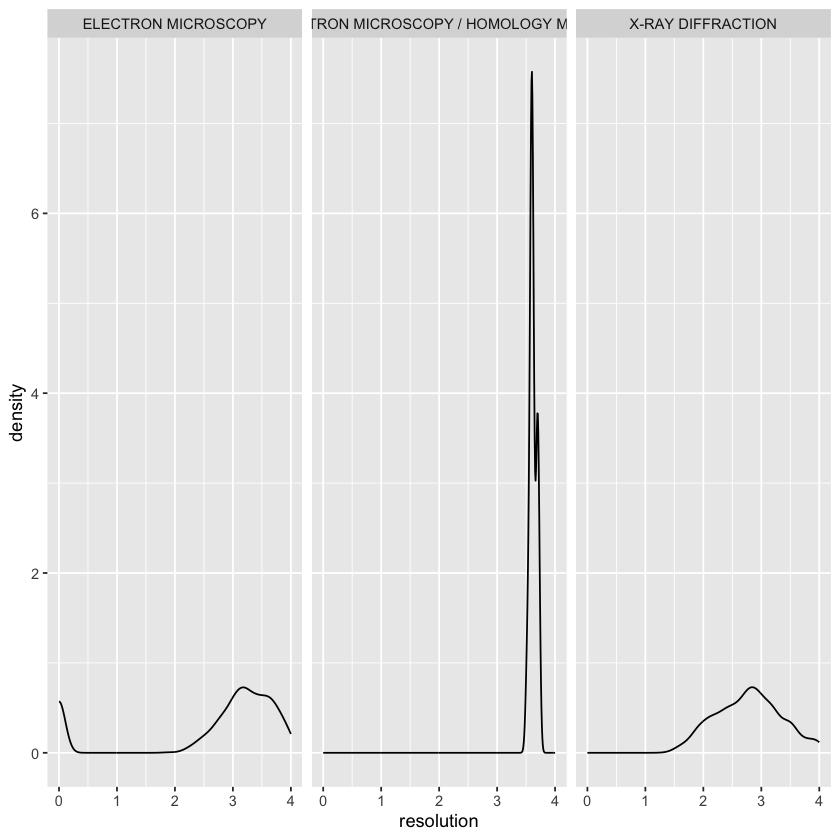

In [23]:
ggplot(abag, aes(resolution)) + geom_density() + facet_wrap(~method)

Warning message:
"Removed 2702 rows containing non-finite values (`stat_density()`)."


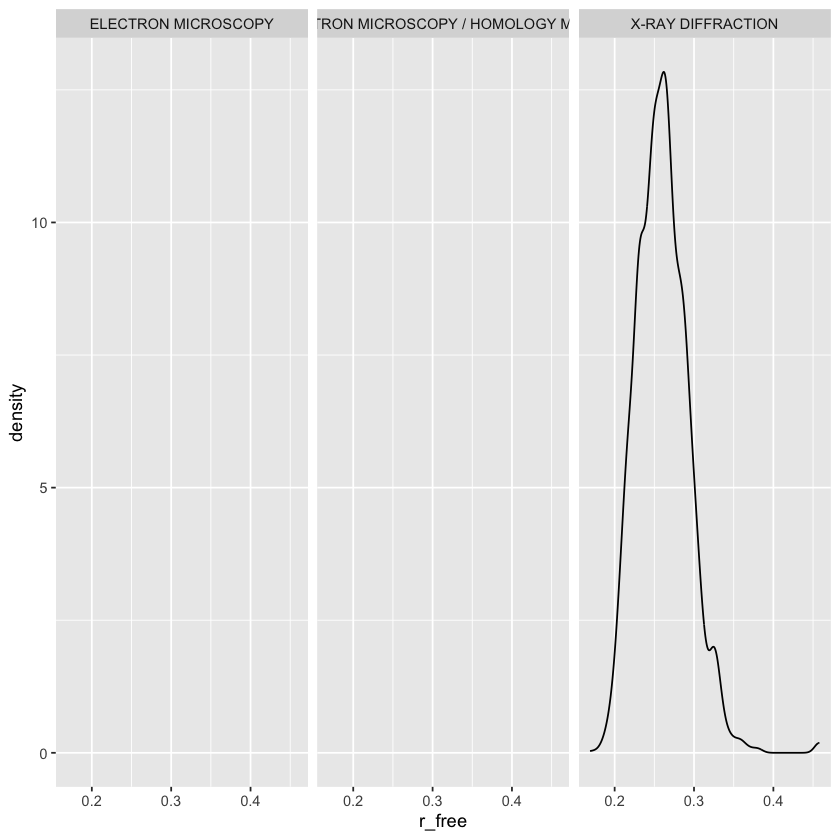

In [24]:
ggplot(abag, aes(r_free)) + geom_density() + facet_wrap(~method)

In [37]:
sum(abag$delta_g != "None", na.rm = TRUE)

[1] 125

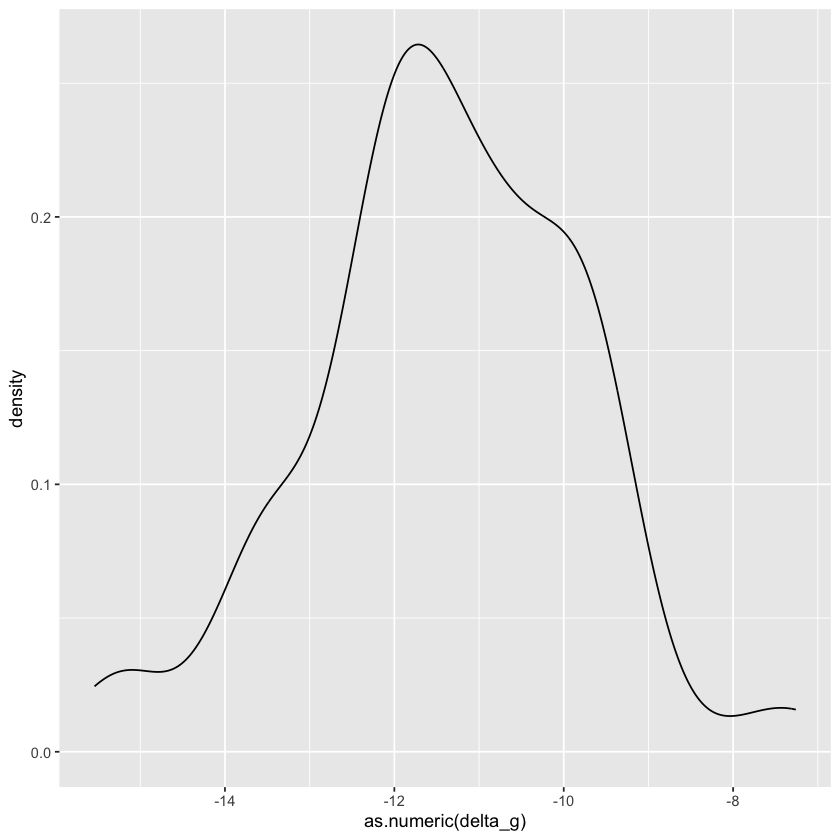

In [34]:
ggplot( filter(abag, delta_g != "None"), aes(as.numeric(delta_g))) + geom_density() 

In [28]:
table(abag$scfv, abag$engineered)

       
        FALSE TRUE
  FALSE   144 4959
  TRUE      0  420

In [31]:
table(abag$antigen_species)


                                                                                                        alkalilimnicola ehrlichii (strain atcc baa-1101/ dsm 17681 / mlhe-1), ruegeria pomeroyi (strain atcc 700808 / dsm 15171 / dss-3) 
                                                                                                                                                                                                                                      10 
                                                                                                                                                                                                                    arabidopsis thaliana 
                                                                                                                                                                                                                                       2 
                                                               